In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
%matplotlib notebook

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import re
from datetime import datetime


In [4]:
df= pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df["Date"]=df["Date"].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))
df_15=df
df=df[df["Date"]<=datetime.strptime("2014-12-31", "%Y-%m-%d")]

In [5]:
df["Day"]=df["Date"].apply(lambda x: x.strftime('%m/%d'))

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
df=df.set_index(["Day", "Date", "ID", "Element"]).sort_index().unstack().dropna()


In [7]:
def remove_extra_day(date):
    datetest= date.timetuple()[2]==29
    monthtest= date.timetuple()[1]==2
    
    if datetest and monthtest:
        return 0
    else:
        return 1
    
        
df=df.reset_index()
df["mask"]=df["Date"].apply(remove_extra_day)
df=df[df["mask"]==1].drop("mask", axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [8]:
df.set_index("Day", inplace=True)
maximum_values=df["Data_Value", "TMAX"].groupby(level=0).apply(lambda x: max(x)/10)
minimum_values=df["Data_Value", "TMIN"].groupby(level=0).apply(lambda x: min(x)/10)


In [9]:
df.reset_index()
date_series= [datetime.strptime(x, "%m/%d") for x in maximum_values.index]

<IPython.core.display.Javascript object>


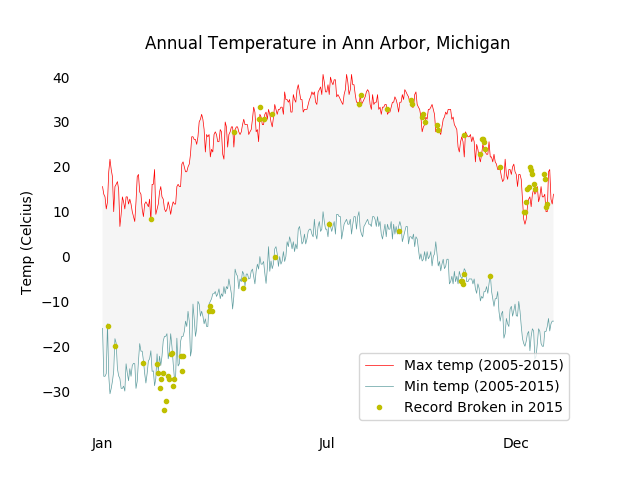

In [10]:
fig, ax = plt.subplots()
ax.plot(date_series, maximum_values,  "-", c="r", lw=0.5, label="Max temp (2005-2015)")
ax.plot(date_series, minimum_values,  "-",c="cadetblue", lw=0.5, label= "Min temp (2005-2015)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.ylabel("Temp (Celcius)")
plt.title("Annual Temperature in Ann Arbor, Michigan")

for spine in ax.spines.values():
    spine.set_visible(False)

In [11]:
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')

plt.fill_between(date_series, maximum_values, minimum_values,
                facecolor='whitesmoke', interpolate=True)


In [12]:
lowerbound=datetime.strptime("2015-01-01", "%Y-%d-%m")
upperbound=datetime.strptime("2015-31-12", "%Y-%d-%m")

df_15
df=df_15[(df_15["Date"]>=lowerbound)&(df_15["Date"]<=upperbound)]

In [13]:
df["Day"]=df["Date"].apply(lambda x: x.strftime('%m/%d'))
df=df.set_index(["Day", "Date", "ID", "Element"]).sort_index().unstack().dropna()
max_2015=df["Data_Value", "TMAX"].groupby(level=0).apply(lambda x: max(x)/10)
min_2015=df["Data_Value", "TMIN"].groupby(level=0).apply(lambda x: min(x)/10)

max_2015=pd.merge(pd.DataFrame(maximum_values), pd.DataFrame(max_2015), how="inner", right_index=True, left_index=True)
min_2015=pd.merge(pd.DataFrame(minimum_values), pd.DataFrame(min_2015), how="inner", right_index=True, left_index=True)


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
def return_greatest(row):
    if row.iloc[0,0]<row.iloc[0,1]:
        return row.iloc[0,1]

max_2015= max_2015.groupby(level=0, axis=0).apply(return_greatest).dropna()

def return_smallest(row):
    if row.iloc[0,0]>row.iloc[0,1]:
        return row.iloc[0,1]

min_2015= min_2015.groupby(level=0, axis=0).apply(return_smallest).dropna()

In [15]:
date_series_max=[datetime.strptime(x, "%m/%d") for x in max_2015.index]
date_series_min=[datetime.strptime(x, "%m/%d") for x in min_2015.index]

In [16]:
ax.plot(date_series_max, max_2015, "o", ms=3, color="y", label = "Record Broken in 2015")


In [17]:
ax.plot(date_series_min, min_2015, "o", ms=3, color="y")

plt.xticks([datetime.strptime("01/01", "%m/%d"), datetime.strptime("07/01", "%m/%d"), datetime.strptime("12/01", "%m/%d")])
plt.legend(loc=4).get_frame()